In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("C:\WORK\Internship\Personality Prediction\personality.csv")

In [3]:
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [4]:
df.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

In [5]:
df.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,19.857422,4.967773,4.627930,4.695312,4.833008,4.568359
std,2.555577,1.525904,1.708824,1.730339,1.658664,1.554866
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,4.000000
50%,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [6]:
df.shape

(1024, 8)

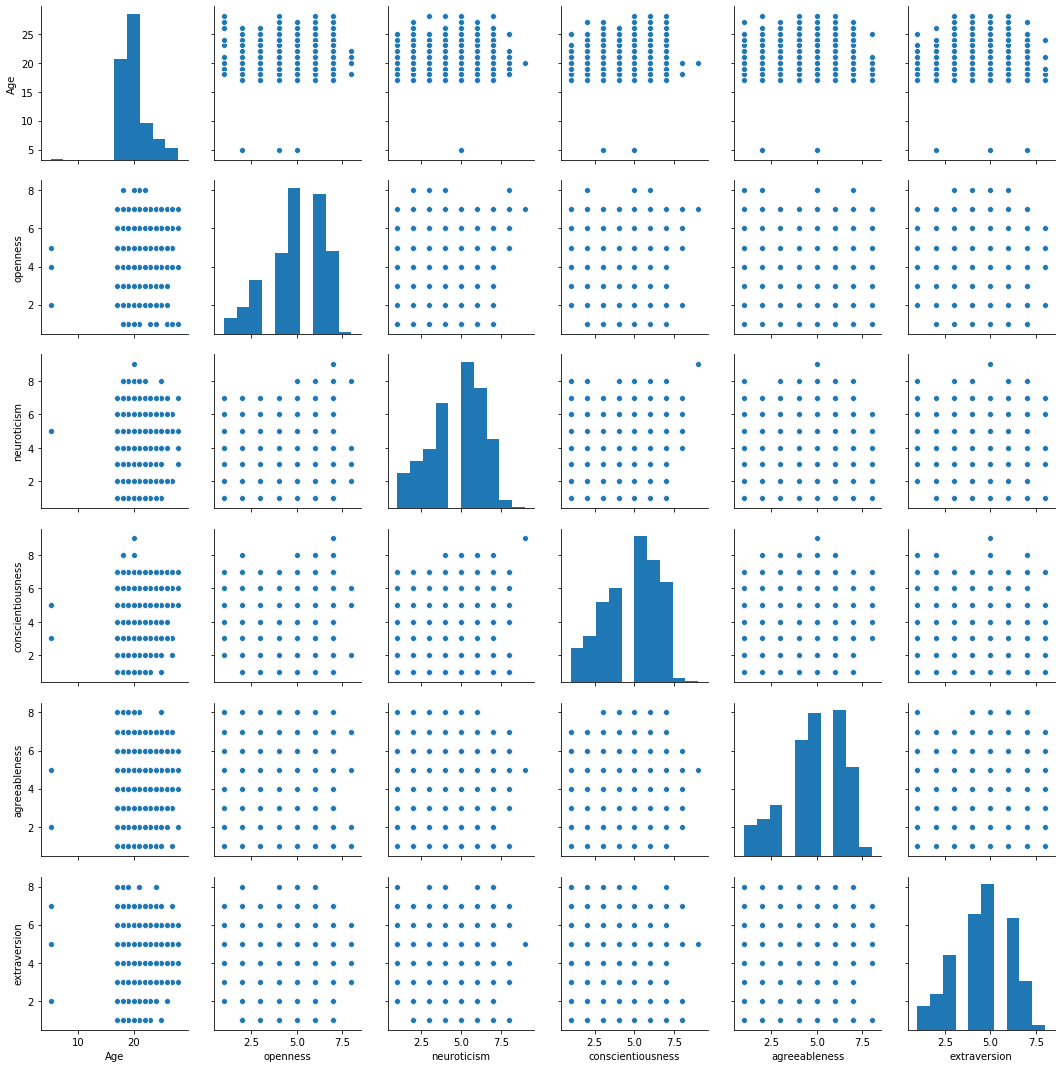

In [7]:
sns.pairplot(df)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Personality (Class label)'])
df['Personality (Class label)']=le.transform(df['Personality (Class label)'])
le.fit(df['Gender'])
df['Gender']=le.transform(df['Gender'])

In [9]:
df.head()
#In Gender column 2 indicates male 1 indicates female 0 indicates NaN
#In Personality column 0:dependable 1:extraverted 2:lively 3:responsible 4:serious

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,2,17,7,4,7,3,2,1
1,2,19,4,5,4,6,6,4
2,1,18,7,6,4,5,5,0
3,1,22,5,6,7,4,3,1
4,1,19,7,4,6,5,4,2


In [10]:
df[df['Gender']==0]

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
449,0,21,2,5,6,1,5,4


In [11]:
df['Gender'].mean()

1.474609375

In [12]:
#Mean is close to 1 so the gender for row 449 will be replaced by 1 indication its a female
df.at[449, 'Gender'] = 1

In [13]:
display(df.iloc[449])

Gender                        1
Age                          21
openness                      2
neuroticism                   5
conscientiousness             6
agreeableness                 1
extraversion                  5
Personality (Class label)     4
Name: 449, dtype: int64

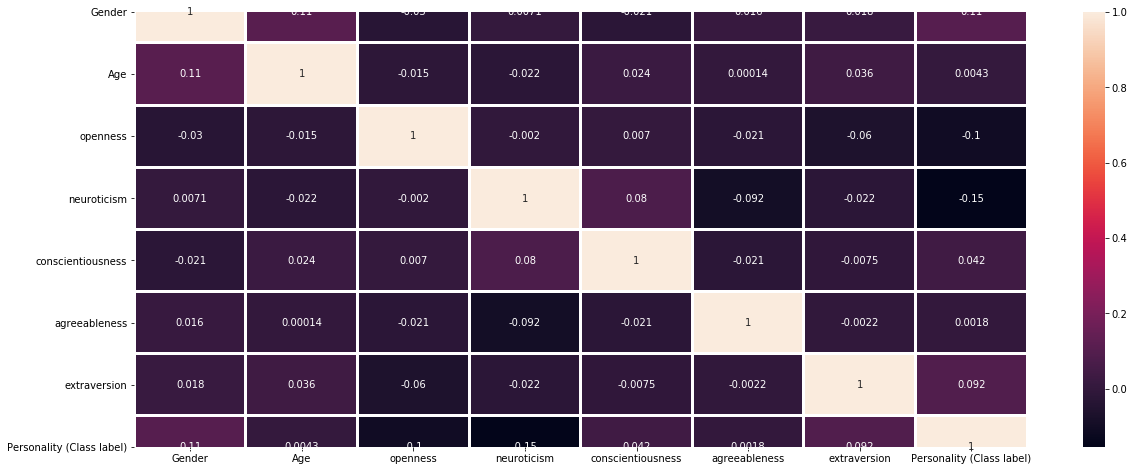

In [14]:
fig1=plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, linecolor='white', linewidth=2 )

In [15]:
x=df[['Gender','Age','openness','neuroticism','conscientiousness','agreeableness','extraversion']]
y=df['Personality (Class label)']

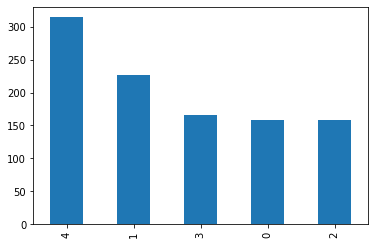

In [16]:
df['Personality (Class label)'].value_counts().plot(kind='bar')

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
seed=100
k=1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

In [19]:
x_res, y_res = sm.fit_resample(x, y)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.3, shuffle=False, random_state=5)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
scaler.fit(x_train)

StandardScaler()

In [23]:
scaler.transform(x_train)

array([[ 1.0905242 , -1.13071218,  1.33668608, ...,  1.32562468,
        -1.09884371, -1.65186096],
       [ 1.0905242 , -0.33515989, -0.62113445, ..., -0.41080145,
         0.71260015,  0.93693789],
       [-0.9169902 , -0.73293603,  1.33668608, ..., -0.41080145,
         0.10878553,  0.28973818],
       ...,
       [-0.9169902 , -0.33515989, -2.57895498, ...,  0.16800726,
        -2.30647295,  0.93693789],
       [-0.9169902 , -0.73293603, -1.92634813, ...,  1.32562468,
         0.71260015,  1.58413761],
       [-0.9169902 ,  0.85816856,  0.0314724 , ...,  1.32562468,
         0.71260015, -0.35746153]])

In [24]:
scaler.transform(x_test)

array([[-0.9169902 ,  2.05149701,  0.0314724 , ...,  0.16800726,
        -1.09884371, -1.65186096],
       [-0.9169902 , -0.73293603, -1.27374129, ...,  1.32562468,
        -0.49502909, -0.35746153],
       [-0.9169902 , -0.33515989,  0.0314724 , ...,  1.32562468,
        -0.49502909, -0.35746153],
       ...,
       [-0.9169902 , -0.33515989,  0.0314724 , ...,  0.74681597,
        -1.09884371, -0.35746153],
       [-0.9169902 , -0.73293603,  0.68407924, ...,  0.16800726,
         0.10878553,  0.28973818],
       [-0.9169902 , -0.33515989,  0.0314724 , ...,  0.74681597,
        -1.09884371, -0.35746153]])

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 5)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

In [47]:
rf.score(x_train,y_train)

0.978161965423112

In [48]:
rf.score(x_test,y_test)

0.7643312101910829

In [49]:
pred = rf.predict(x_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Accuracy: \n", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        80
           1       0.67      0.83      0.74        87
           2       0.97      0.72      0.82       156
           3       0.91      0.74      0.81       148
           4       0.00      0.00      0.00         0

    accuracy                           0.76       471
   macro avg       0.65      0.62      0.63       471
weighted avg       0.85      0.76      0.79       471


Confusion Matrix: 
 [[ 67   6   0   1   6]
 [  5  72   1   5   4]
 [ 14  13 112   5  12]
 [ 12  16   3 109   8]
 [  0   0   0   0   0]]
Accuracy: 
 0.7643312101910829


C:\WORK\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\WORK\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\WORK\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [113]:
classifier.score(x_train,y_train)

0.9954504094631483

In [114]:
classifier.score(x_test,y_test)

0.8726114649681529

In [115]:
pred1 = classifier.predict(x_test)

In [116]:
print(classification_report(y_test, pred1))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, pred1))
print("Accuracy: \n", accuracy_score(y_test, pred1))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        80
           1       0.87      0.90      0.88        87
           2       0.98      0.85      0.91       156
           3       0.92      0.86      0.89       148
           4       0.00      0.00      0.00         0

    accuracy                           0.87       471
   macro avg       0.72      0.70      0.71       471
weighted avg       0.92      0.87      0.89       471


Confusion Matrix: 
 [[ 72   3   0   3   2]
 [  2  78   2   3   2]
 [  1   4 133   5  13]
 [  9   5   1 128   5]
 [  0   0   0   0   0]]
Accuracy: 
 0.8726114649681529


C:\WORK\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\WORK\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\WORK\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
